In [41]:
import pandas as pd
import datetime
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [42]:
data = pd.read_csv("social_data.csv")
data

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video
...,...,...,...,...,...,...,...
3474,01-03-2023 10:35,CSGO,TWITTER,N/A,0,0,Link
3475,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3476,01-03-2023 10:34,CSGO,TWITTER,N/A,0,0,Link
3477,01-03-2023 10:34,CSGO,TWITTER,N/A,2116,42,Text


In [43]:
# def date_convert(date):
#      return datetime.datetime.strptime(data['Date'], '%Y-%m-%d').strftime('%A')
# pattern = '(\d+-\d+-\d+)'
# timepattern = '( \d+:\d+)'
# data['Published Date'] = data['Published Date'].astype('string')
# for date in data['Published Date']:
#     data['Date'] = data['Published Date'].str.extract(pattern)
# for date in data['Published Date']:
#     data['Time'] = data['Published Date'].str.extract(timepattern)

In [44]:
data['Date'] = pd.to_datetime(data['Published Date'])

In [45]:
# data['Day'] = data['Date'].apply(lambda x: datetime.datetime.strptime(x, "%m-%d-%Y").strftime("%A"))
# data

In [46]:
datatype = data.dtypes['Date']
data['Date'].dt.hour
def add_hour(df, time_col, result_col):
    hour = df[time_col].dt.hour
    minute = df[time_col].dt.minute
    second = df[time_col].dt.second
    df[result_col] = hour + minute/60
    return df
data['Time'] = data['Date'].dt.hour + data['Date'].dt.minute/60
data['Day'] = data['Date'].dt.day_name()
data['Engagement Rates'] = data['Total Engagements'] / data['Total Impressions']
data['Engagement Rates'] = data['Engagement Rates'].fillna(0)
data.head(25)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Time,Day,Engagement Rates
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:55:00,19.916667,Friday,0.000000
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:00,19.816667,Friday,0.000000
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:00,19.816667,Friday,0.000000
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text,2023-03-31 19:49:00,19.816667,Friday,0.000000
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video,2023-03-31 19:43:00,19.716667,Friday,0.127666
5,03-31-2023 19:42,CSGO,TWITTER,N/A,0,0,Photo,2023-03-31 19:42:00,19.700000,Friday,0.000000
6,03-31-2023 19:40,CSGO,TWITTER,Community Engagement,1882,83,Photo,2023-03-31 19:40:00,19.666667,Friday,0.044102
7,03-31-2023 19:23,CSGO,TWITTER,Community Engagement,17892,3076,Video,2023-03-31 19:23:00,19.383333,Friday,0.171920
8,03-31-2023 19:15,CSGO,TWITTER,N/A,0,0,Video,2023-03-31 19:15:00,19.250000,Friday,0.000000
9,03-31-2023 18:55,CSGO,TWITTER,Community Engagement,13874,1447,Video,2023-03-31 18:55:00,18.916667,Friday,0.104296


<AxesSubplot:xlabel='Day', ylabel='Engagement Rates'>

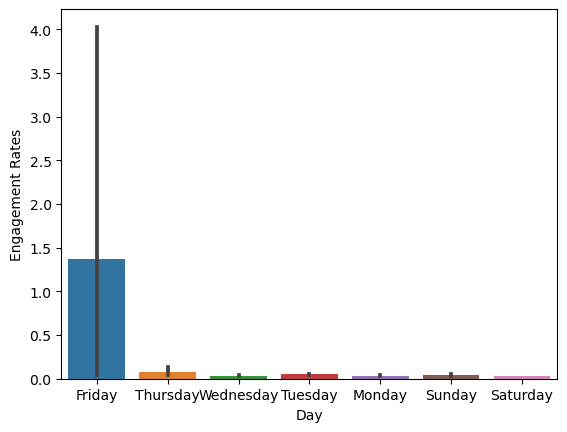

In [47]:
sns.barplot(data = data, x = 'Day', y = 'Engagement Rates')

In [48]:
data[data['Account Type'] == 'FBPAGE']

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Date,Time,Day,Engagement Rates
10,03-31-2023 18:36,General,FBPAGE,Community Engagement,37692,8044,Photo,2023-03-31 18:36:00,18.600000,Friday,0.213414
21,03-31-2023 16:22,General,FBPAGE,Community Engagement,42328,8936,Photo,2023-03-31 16:22:00,16.366667,Friday,0.211113
40,03-31-2023 14:05,General,FBPAGE,Community Engagement,17222,952,Photo,2023-03-31 14:05:00,14.083333,Friday,0.055278
47,03-31-2023 13:00,General,FBPAGE,Community Engagement,36197,5408,Photo,2023-03-31 13:00:00,13.000000,Friday,0.149405
50,03-31-2023 11:30,General,FBPAGE,Community Engagement,13774,1396,Photo,2023-03-31 11:30:00,11.500000,Friday,0.101350
...,...,...,...,...,...,...,...,...,...,...,...
3433,01-09-2023 10:00,General,FBPAGE,N/A,107752,29860,Text,2023-01-09 10:00:00,10.000000,Monday,0.277118
3457,01-05-2023 11:55,General,FBPAGE,N/A,300,3776,Photo,2023-01-05 11:55:00,11.916667,Thursday,12.586667
3461,01-04-2023 14:57,General,FBPAGE,Community Engagement,155521,19098,Photo,2023-01-04 14:57:00,14.950000,Wednesday,0.122800
3465,01-04-2023 13:00,General,FBPAGE,Community Engagement,29051,811,Photo,2023-01-04 13:00:00,13.000000,Wednesday,0.027916


In [49]:
data.groupby('Account Type')['Total Engagements'].sum()

Account Type
FBPAGE              2577284
INSTAGRAM             84087
LINKEDIN_COMPANY        849
TIKTOK_BUSINESS       18865
TWITTER              604559
YOUTUBE               10328
Name: Total Engagements, dtype: int64

In [50]:
data.groupby('Account Type')['Engagement Rates'].sum()

Account Type
FBPAGE              1027.054354
INSTAGRAM              3.920599
LINKEDIN_COMPANY       0.394904
TIKTOK_BUSINESS        6.007931
TWITTER               63.387880
YOUTUBE                6.707538
Name: Engagement Rates, dtype: float64

In [51]:
data.groupby('Account Type')['Engagement Rates'].mean()

Account Type
FBPAGE              1.755648
INSTAGRAM           0.006668
LINKEDIN_COMPANY    0.017950
TIKTOK_BUSINESS     0.053168
TWITTER             0.032490
YOUTUBE             0.030489
Name: Engagement Rates, dtype: float64

In [52]:
# data.groupby('Account Type')['Engagement Rates'].mean()
data[data['Account Type'] == 'FBPAGE']['Total Engagements']/data[data['Account Type'] == 'FBPAGE']['Total Impressions']

10       0.213414
21       0.211113
40       0.055278
47       0.149405
50       0.101350
          ...    
3433     0.277118
3457    12.586667
3461     0.122800
3465     0.027916
3478          NaN
Length: 585, dtype: float64

In [53]:
data.groupby('Campaign Name')['Engagement Rates'].sum()

Campaign Name
Community Engagement       79.503456
Evergreen                   5.651982
Evil Exhibited             11.263615
N/A                      1011.054152
Name: Engagement Rates, dtype: float64

In [54]:
data.groupby('Campaign Name')['Engagement Rates'].mean()

Campaign Name
Community Engagement     0.056345
Evergreen                0.034675
Evil Exhibited           0.026818
N/A                      0.680845
Name: Engagement Rates, dtype: float64

In [55]:
data.groupby('Campaign Name')['Total Engagements'].sum()

Campaign Name
Community Engagement     2044767
Evergreen                  43127
Evil Exhibited            185305
N/A                      1022773
Name: Total Engagements, dtype: int64

In [56]:
data.groupby('Account')['Total Engagements'].sum()

Account
CSGO                  92336
Content Creators       1387
DOTA2                123990
General                 849
General             3076479
Valorant                931
Name: Total Engagements, dtype: int64

In [57]:
data.groupby('Account')['Engagement Rates'].sum()

Account
CSGO                   8.182476
Content Creators       2.160085
DOTA2                 34.515305
General                0.394904
General             1060.405519
Valorant               1.814917
Name: Engagement Rates, dtype: float64

In [58]:
data.groupby('Account')['Engagement Rates'].mean()

Account
CSGO                0.030305
Content Creators    0.040756
DOTA2               0.042983
General             0.017950
General             0.466933
Valorant            0.030249
Name: Engagement Rates, dtype: float64

<BarContainer object of 3479 artists>

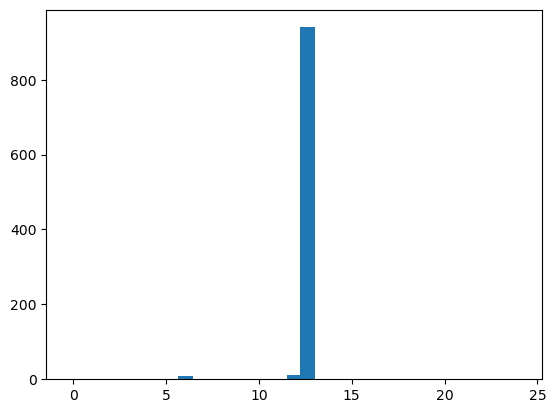

In [59]:
plt.bar('Time', 'Engagement Rates', data = data)

In [60]:
data.groupby('Day')['Engagement Rates'].sum()

Day
Friday       969.658948
Monday         8.402261
Saturday       9.788983
Sunday        16.159581
Thursday      55.993295
Tuesday       28.363858
Wednesday     19.106279
Name: Engagement Rates, dtype: float64

In [61]:
data.groupby('Day')['Engagement Rates'].mean()

Day
Friday       1.369575
Monday       0.035907
Saturday     0.030686
Sunday       0.042978
Thursday     0.079311
Tuesday      0.050559
Wednesday    0.033228
Name: Engagement Rates, dtype: float64

In [62]:
data.groupby('Time')['Engagement Rates'].sum().sort_values(ascending = False)

Time
12.616667    940.247565
11.916667     12.598812
6.033333       9.794514
9.000000       4.789780
12.500000      2.758976
                ...    
19.700000      0.000000
12.183333      0.000000
12.216667      0.000000
12.300000      0.000000
0.166667       0.000000
Name: Engagement Rates, Length: 800, dtype: float64

<BarContainer object of 3479 artists>

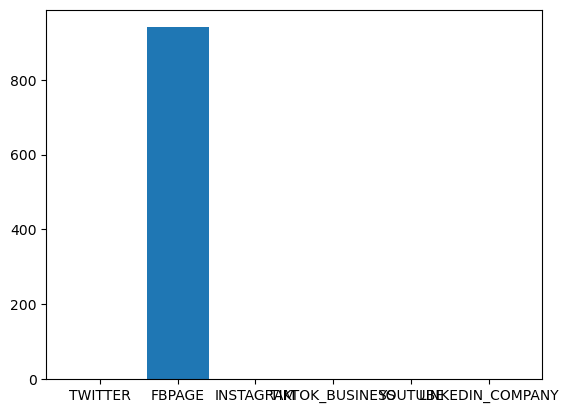

In [63]:
plt.bar('Account Type', 'Engagement Rates', data = data)

In [64]:
data['Engagement Rates'].mean() * 100

31.833090116954327

In [65]:
data.groupby('Account').agg(np.mean)

,Total Impressions,Total Engagements,Time,Engagement Rates
Account,,,,
CSGO,8570.066667,341.985185,13.540185,0.030305
Content Creators,852.566038,26.169811,13.394025,0.040756
DOTA2,2315.474471,154.408468,12.755002,0.042983
General,1945.500000,38.590909,11.931061,0.017950
General,14922.481726,1354.680317,12.814010,0.466933
Valorant,382.983333,15.516667,12.005000,0.030249


In [66]:
data.groupby('Account').agg(np.sum)

,Total Impressions,Total Engagements,Time,Engagement Rates
Account,,,,
CSGO,2313918,92336,3655.850000,8.182476
Content Creators,45186,1387,709.883333,2.160085
DOTA2,1859326,123990,10242.266667,34.515305
General,42801,849,262.483333,0.394904
General,33888956,3076479,29100.616667,1060.405519
Valorant,22979,931,720.300000,1.814917


In [67]:
data.groupby(['Account Type', 'Account']).agg(np.mean)


Total Impressions  Total Engagements  \
Account Type     Account                                                  
FBPAGE           General                24740.423932        4405.613675   
INSTAGRAM        General                 6078.331633         143.005102   
LINKEDIN_COMPANY General                 1945.500000          38.590909   
TIKTOK_BUSINESS  General                 3045.654867         166.946903   
TWITTER          CSGO                    8570.066667         341.985185   
                 DOTA2                   2252.592453         150.174843   
                 General                17376.825056         443.379233   
YOUTUBE          Content Creators         852.566038          26.169811   
                 DOTA2                   8564.375000         575.125000   
                 General                 1027.505051          34.434343   
                 Valorant                 382.983333          15.516667   

                                        Time  Engagement Rates  
Account Type     Account                                        
FBPAGE           General           12.002393          1.755648  
INSTAGRAM        General           12.532937          0.006668  
LINKEDIN_COMPANY General           11.931061          0.017950  
TIKTOK_BUSINESS  General           11.687316          0.053168  
TWITTER          CSGO              13.540185          0.030305  
                 DOTA2             12.745807          0.043100  
                 General           13.699944          0.023635  
YOUTUBE          Content Creators  13.394025          0.040756  
                 DOTA2             13.668750          0.031323  
                 General           12.636700          0.025070  
                 Valorant          12.005000          0.030249

In [68]:
from scipy.stats import binom

def calc_likelihood(total_engagements, total_impressions, engagement_rate):
    likelihood = binom.pmf(total_engagements, total_impressions, engagement_rate)
    return likelihood

In [69]:
likelihood = np.sum(calc_likelihood(data['Total Engagements'], data['Total Impressions'], 0.15))/3479
print("Likelihood of achieving a 15% engagement rate:", likelihood)

Likelihood of achieving a 15% engagement rate: 0.21668891011352556


In [70]:
np.sum(data['Total Engagements'])

3295972

In [71]:
np.sum(data['Total Engagements'])/np.sum(data['Total Impressions'])

0.08634264184427354

Assessment Task
1. The typical engagement rate we can expect is about 8.6%, and the likelihood that we can achieve a 15% engagement rate is about 21.6%.

2. The day of the week and time do affect engagement rates. The data shows that Fridays at 12:30 are the best times for engagement rates.

3. The game title that is doing the best is DOTA2 about 1.2% more engagement than both CSGO and Valorant. Both CS:GO and Valorant would require different strategies for their posting in order to garner more engagement. We see that CS:GO has many posts, but its engagement rate is still low. This may indicate an issue with the posting strategy. DOTA2 has about 80% of the impressions as CS:GO yet has 33% more total engagements. As for Valorant, it is obvious that it must be focused on more. The game has the least engagements and impressions by far out of all three game titles. Seeing as the game is fairly new, this game must be focused on the most out of the titles.

4. The FB Page performs best out of all media types.

5. The best performing campaign besides the N/A campaigns is the "Community Engagement" campaign.

6. Based on my discoveries, the posting strategy I would recommend is posting on Fridays around 12:30PM on the FB Page. If that is not viable, then posting on Thursdays around noon on TikTok. It would be smart to create more community engagement posts for Valorant and CS:GO, so that their engagement rates increase to DOTA2's level.

7. When grouping by both Account and Account Type, we see that the game titles are not included in the FB page. It would be smart to make more posts about Valorant, CS:GO, and DOTA2 on the FB page to increase engagement rates for all games. After all, Facebook is the best performing media type and should be treated as such. 